# K-Means implementation

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.datasets import make_blobs

%matplotlib inline

In [3]:
X, y = make_blobs(n_samples=1000, centers=3, n_features=2)

In [4]:
X

array([[-0.64022815, -0.50976696],
       [ 1.17339963,  0.01983079],
       [ 0.21791264, -7.1841941 ],
       ...,
       [ 6.35188307, -1.35000904],
       [ 4.77571587, -3.10238257],
       [ 1.26665122,  0.98089252]])

In [5]:
y

array([0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 2, 1, 2, 2, 2, 2, 2, 0, 2, 0, 0,
       1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 0, 0, 0, 2, 2, 0, 0, 1, 2, 0, 2, 0,
       2, 2, 0, 0, 1, 2, 2, 0, 0, 1, 1, 0, 2, 1, 1, 0, 1, 1, 0, 2, 0, 1,
       1, 2, 0, 2, 2, 1, 1, 2, 1, 0, 1, 1, 0, 2, 1, 2, 1, 2, 1, 0, 2, 1,
       1, 1, 0, 0, 1, 2, 1, 0, 2, 2, 2, 0, 1, 2, 0, 2, 2, 2, 2, 0, 0, 0,
       0, 1, 2, 2, 0, 1, 2, 2, 1, 2, 2, 1, 0, 0, 2, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 2, 0, 2, 0, 2, 0, 0, 1, 2, 1, 0, 0,
       0, 1, 1, 2, 2, 2, 0, 1, 1, 2, 1, 2, 0, 1, 0, 1, 2, 2, 0, 2, 2, 2,
       2, 0, 0, 1, 1, 2, 0, 2, 0, 1, 2, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 1,
       2, 0, 0, 2, 2, 1, 1, 2, 2, 2, 2, 0, 2, 0, 2, 1, 2, 2, 0, 0, 2, 2,
       0, 2, 1, 0, 0, 2, 2, 0, 1, 0, 1, 0, 2, 2, 0, 1, 0, 0, 1, 2, 1, 2,
       0, 1, 1, 2, 0, 1, 1, 1, 2, 2, 0, 2, 0, 1, 1, 0, 1, 1, 2, 0, 1, 2,
       0, 1, 1, 1, 2, 1, 2, 1, 0, 1, 2, 1, 1, 0, 0, 0, 0, 2, 2, 2, 2, 0,
       2, 1, 0, 1, 0, 1, 2, 2, 0, 1, 1, 1, 1, 2, 2,

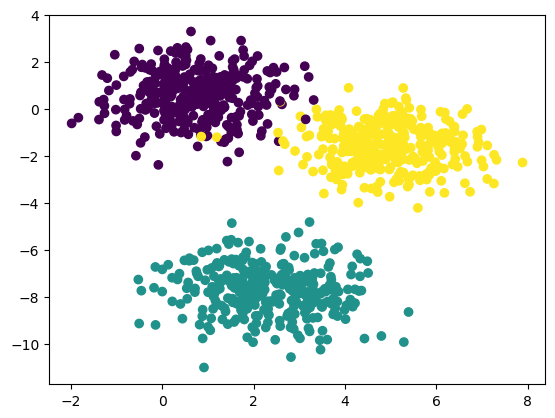

In [6]:
plt.scatter(X[:, 0], X[:, 1], c=y)

In [7]:
## Standardization --feature scaling technique
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [8]:
# Train test split
from sklearn.model_selection import train_test_split

X_train, X_test, _, _ = train_test_split(X, y, test_size=0.33, random_state=42)

In [9]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
from sklearn.cluster import KMeans

In [11]:
## Elbow method to select the k value (centroid)
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(X_train_scaled)
    wcss.append(kmeans.inertia_)

In [12]:
wcss

[1339.9999999999998,
 752.1366401314257,
 217.98117714842144,
 179.28948469698213,
 136.92296060244007,
 103.87904970291109,
 94.53911022817742,
 87.64117711200933,
 83.30474272894661,
 69.63500238436086]

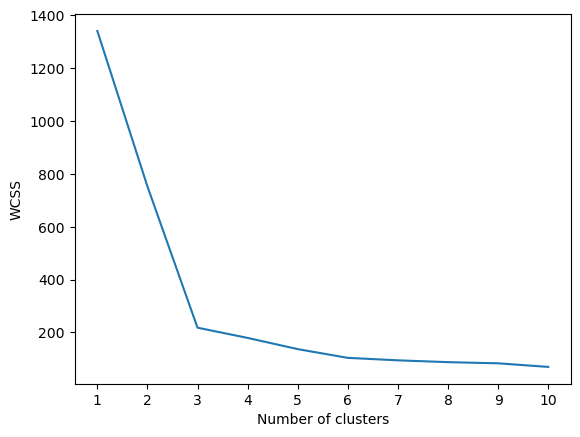

In [13]:
## Plot the elbow method
plt.plot(range(1, 11), wcss)
plt.xticks(range(1, 11))
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [14]:
kmeans = KMeans(n_clusters=3, init='k-means++')

In [15]:
kmeans.fit_predict(X_train_scaled)

array([1, 2, 1, 0, 2, 2, 2, 1, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       0, 1, 0, 2, 1, 2, 0, 1, 0, 1, 2, 1, 0, 0, 2, 1, 2, 1, 0, 1, 2, 1,
       2, 2, 2, 1, 2, 2, 0, 2, 1, 2, 2, 1, 2, 0, 1, 2, 0, 2, 1, 2, 1, 1,
       2, 0, 1, 1, 0, 0, 2, 2, 0, 0, 2, 0, 2, 1, 0, 2, 2, 2, 0, 0, 0, 1,
       2, 2, 2, 2, 0, 0, 0, 2, 1, 0, 1, 2, 2, 1, 1, 2, 2, 0, 2, 0, 1, 0,
       2, 1, 2, 0, 0, 1, 2, 1, 1, 1, 1, 2, 1, 1, 0, 1, 2, 2, 1, 0, 0, 1,
       2, 1, 0, 1, 2, 1, 0, 0, 1, 0, 2, 0, 2, 2, 0, 1, 2, 2, 2, 0, 1, 1,
       1, 2, 1, 2, 0, 1, 2, 0, 1, 0, 1, 2, 0, 1, 2, 1, 2, 2, 0, 0, 0, 2,
       0, 0, 2, 0, 2, 2, 1, 1, 2, 0, 0, 0, 2, 0, 1, 1, 1, 0, 0, 2, 1, 0,
       1, 1, 0, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 0, 2, 0, 1, 2, 1, 1, 1, 0,
       1, 0, 2, 0, 1, 1, 1, 1, 2, 1, 1, 2, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       2, 1, 1, 0, 1, 2, 1, 0, 2, 1, 1, 2, 0, 2, 2, 0, 2, 1, 1, 2, 2, 2,
       1, 2, 0, 1, 1, 1, 1, 2, 0, 0, 1, 0, 2, 0, 2, 1, 0, 2, 0, 2, 2, 0,
       2, 1, 0, 1, 1, 1, 2, 1, 1, 2, 0, 0, 2, 2, 2,

In [16]:
y_pred = kmeans.predict(X_test_scaled)

In [17]:
y_pred

array([0, 1, 0, 1, 0, 0, 1, 1, 0, 2, 2, 0, 0, 1, 1, 1, 2, 0, 2, 2, 0, 1,
       2, 2, 1, 0, 1, 1, 2, 0, 1, 0, 1, 2, 2, 1, 0, 0, 2, 2, 1, 1, 1, 2,
       1, 2, 2, 0, 0, 1, 1, 1, 2, 0, 0, 1, 0, 2, 1, 1, 0, 0, 2, 2, 1, 2,
       2, 2, 1, 1, 2, 2, 2, 0, 1, 0, 0, 0, 1, 2, 2, 0, 0, 1, 0, 2, 1, 1,
       1, 1, 0, 2, 2, 1, 0, 2, 0, 0, 1, 0, 1, 1, 0, 0, 1, 2, 0, 0, 2, 2,
       1, 1, 0, 1, 1, 1, 2, 0, 2, 2, 2, 0, 1, 1, 2, 0, 1, 1, 2, 1, 1, 0,
       0, 0, 0, 2, 2, 1, 1, 0, 1, 0, 1, 1, 0, 2, 1, 0, 0, 0, 0, 1, 1, 0,
       2, 0, 0, 2, 0, 1, 1, 2, 2, 1, 2, 2, 0, 1, 1, 0, 0, 2, 2, 0, 2, 1,
       2, 0, 2, 1, 1, 2, 0, 2, 0, 0, 0, 2, 0, 1, 0, 1, 1, 2, 0, 0, 0, 1,
       2, 2, 1, 1, 0, 2, 1, 0, 1, 0, 2, 0, 0, 0, 0, 2, 1, 2, 2, 0, 0, 0,
       2, 1, 1, 1, 2, 0, 1, 0, 0, 1, 2, 1, 0, 2, 2, 1, 2, 2, 2, 2, 2, 0,
       0, 2, 2, 2, 1, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 1, 2, 1, 0,
       2, 0, 2, 1, 1, 1, 2, 0, 2, 1, 0, 0, 2, 1, 1, 1, 2, 0, 1, 2, 2, 1,
       2, 0, 2, 0, 1, 2, 2, 2, 0, 1, 2, 2, 0, 0, 2,

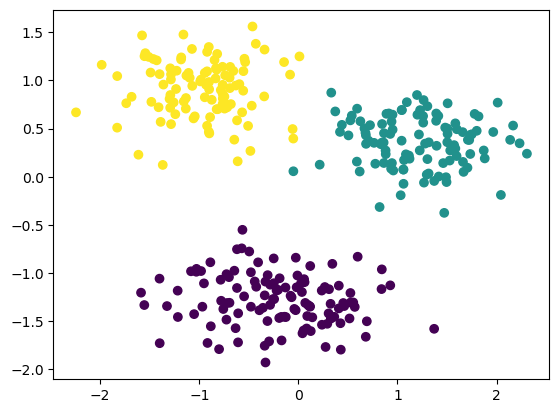

In [18]:
plt.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], c=y_pred)

## Validating the k value
### KneeLocator
### Sillhoutee Scoring

In [19]:
## Kneelocator
from kneed import KneeLocator

In [20]:
kl = KneeLocator(range(1, 11), wcss, curve='convex', direction='decreasing')

In [21]:
kl.elbow

3

In [22]:
## Silhouette score
from sklearn.metrics import silhouette_score

In [23]:
silhouette_coefficients = []
for k in range(2, 11):
    kmens = KMeans(n_clusters=k, init='k-means++')
    kmens.fit(X_train_scaled)
    score = silhouette_score(X_train_scaled, kmens.labels_)
    silhouette_coefficients.append(score)

In [24]:
silhouette_coefficients

[0.48040942034922857,
 0.6541480471028118,
 0.5819011835265393,
 0.4869898958333801,
 0.42403956458606484,
 0.39070986249382833,
 0.3675754158546696,
 0.3427584793306787,
 0.34325895726480427]

Text(0, 0.5, 'Silhouette Coefficient')

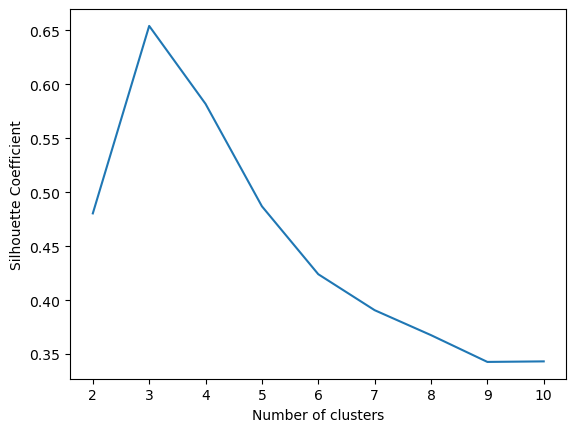

In [25]:
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')

 ### The spike indicates the best k value performance